**Rusty Bargain Used Car Sales**
---

### Introduction
---
This project focused on predicting the market value of used cars for Rusty Bargain's app using machine learning models. During exploratory data analysis (EDA), column labels were standardized, irrelevant features removed, duplicates and outliers addressed, and categorical variables encoded. The dataset was refined to over 170,000 observations, ensuring high-quality data for modeling. Multiple models, including Gradient Boosting, tree-based methods, and Linear Regression, were evaluated based on RMSE, training time, and prediction speed, with CatBoost emerging as the top performer.

### Importing Libraries
---

In [79]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
from time import time
from time import time as timer
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings

### Importing dataset
---

In [27]:
df = pd.read_csv('/datasets/car_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


### Exploratory Data Analysis (EDA)
---

In [28]:
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'vehicle_type',
                        'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox',
                        'Power': 'power', 'Model': 'model', 'Mileage': 'mileage',
                        'RegistrationMonth': 'registration_month', 'FuelType': 'fuel_type',
                        'Brand': 'brand', 'NotRepaired': 'not_repaired',
                        'DateCreated': 'date_created', 'NumberOfPictures': 'number_pictures',
                        'PostalCode': 'postal_code', 'LastSeen': 'last_seen'})

In [29]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%d/%m/%Y %H:%M') 
df['date_created'] = pd.to_datetime(df['date_created'], format='%d/%m/%Y %H:%M') 
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%d/%m/%Y %H:%M') 

In [30]:
df.duplicated().sum()

262

In [31]:
df = df.drop_duplicates() 

In [32]:
df = df.drop(['date_crawled','date_created','last_seen','number_pictures'], axis=1).reset_index(drop=True)

In [33]:
check_na = df.isna().sum()
print(check_na)

price                     0
vehicle_type          37484
registration_year         0
gearbox               19830
power                     0
model                 19701
mileage                   0
registration_month        0
fuel_type             32889
brand                     0
not_repaired          71145
postal_code               0
dtype: int64


In [34]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245567 entries, 3 to 354105
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               245567 non-null  int64 
 1   vehicle_type        245567 non-null  object
 2   registration_year   245567 non-null  int64 
 3   gearbox             245567 non-null  object
 4   power               245567 non-null  int64 
 5   model               245567 non-null  object
 6   mileage             245567 non-null  int64 
 7   registration_month  245567 non-null  int64 
 8   fuel_type           245567 non-null  object
 9   brand               245567 non-null  object
 10  not_repaired        245567 non-null  object
 11  postal_code         245567 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 24.4+ MB


In [35]:
count_zero = (df == 0).sum()
print(count_zero)

price                 3386
vehicle_type             0
registration_year        0
gearbox                  0
power                 9611
model                    0
mileage                  0
registration_month    7531
fuel_type                0
brand                    0
not_repaired             0
postal_code              0
dtype: int64


In [36]:
df = df[(df['price'] != 0) & (df['power'] != 0)]
count_zero_check = (df == 0).sum()
print(count_zero_check)

price                    0
vehicle_type             0
registration_year        0
gearbox                  0
power                    0
model                    0
mileage                  0
registration_month    5601
fuel_type                0
brand                    0
not_repaired             0
postal_code              0
dtype: int64


In [37]:
df.describe()

,price,registration_year,power,mileage,registration_month,postal_code
count,233029.000000,233029.000000,233029.000000,233029.000000,233029.000000,233029.000000
mean,5291.863219,2003.088148,124.824739,127018.568504,6.219724,51775.819752
std,4729.981297,6.082840,137.559774,37079.072487,3.453431,25820.005800
min,1.000000,1910.000000,1.000000,5000.000000,0.000000,1067.000000
25%,1555.000000,1999.000000,82.000000,125000.000000,3.000000,31228.000000
50%,3690.000000,2004.000000,116.000000,150000.000000,6.000000,51103.000000
75%,7750.000000,2007.000000,150.000000,150000.000000,9.000000,72622.000000
max,20000.000000,2018.000000,20000.000000,150000.000000,12.000000,99998.000000


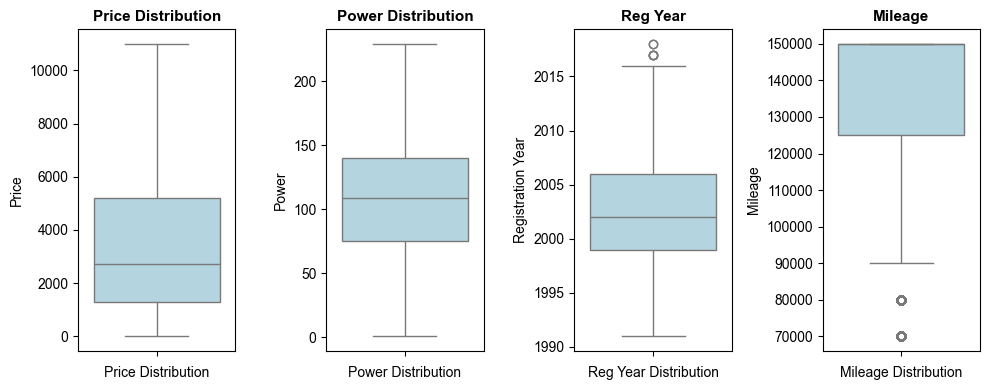

In [96]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))  

sns.boxplot(y=df["price"], color="lightblue", ax=axes[0])
axes[0].set_title("Price Distribution", fontsize=11, fontweight='bold')
axes[0].set_ylabel("Price")
axes[0].set_xlabel("Price Distribution")

sns.boxplot(y=df["power"], color="lightblue", ax=axes[1])
axes[1].set_title("Power Distribution", fontsize=11, fontweight='bold')
axes[1].set_ylabel("Power")
axes[1].set_xlabel("Power Distribution")

sns.boxplot(y=df["registration_year"], color="lightblue", ax=axes[2])
axes[2].set_title("Reg Year", fontsize=11, fontweight='bold')
axes[2].set_ylabel("Registration Year")
axes[2].set_xlabel("Reg Year Distribution")

sns.boxplot(y=df["mileage"], color="lightblue", ax=axes[3])
axes[3].set_title("Mileage", fontsize=11, fontweight='bold')
axes[3].set_ylabel("Mileage")
axes[3].set_xlabel("Mileage Distribution")

plt.tight_layout()

mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "Helvetica", "DejaVu Sans", "Bitstream Vera Sans"]
plt.show()

In [39]:
df = df[(df['price'] < 11000) & (df['power'] < 230) & (df['registration_year'] > 1990) & (df['mileage'] > 60000)]

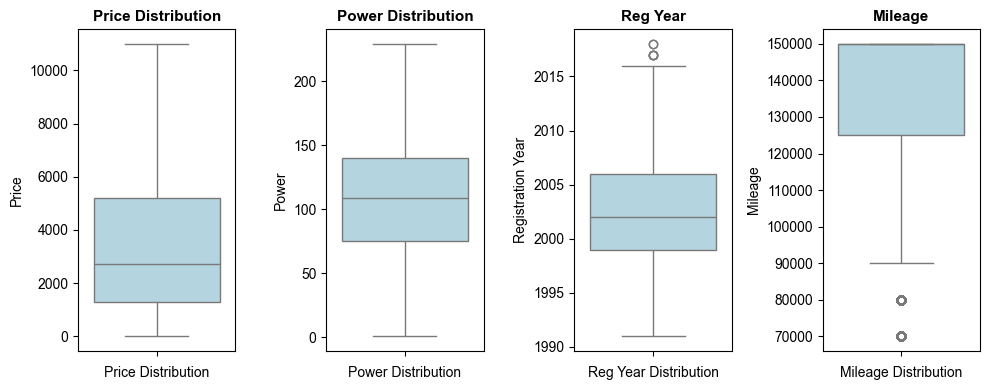

In [97]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))  

sns.boxplot(y=df["price"], color="lightblue", ax=axes[0])
axes[0].set_title("Price Distribution", fontsize=11, fontweight='bold')
axes[0].set_ylabel("Price")
axes[0].set_xlabel("Price Distribution")

sns.boxplot(y=df["power"], color="lightblue", ax=axes[1])
axes[1].set_title("Power Distribution", fontsize=11, fontweight='bold')
axes[1].set_ylabel("Power")
axes[1].set_xlabel("Power Distribution")

sns.boxplot(y=df["registration_year"], color="lightblue", ax=axes[2])
axes[2].set_title("Reg Year", fontsize=11, fontweight='bold')
axes[2].set_ylabel("Registration Year")
axes[2].set_xlabel("Reg Year Distribution")

sns.boxplot(y=df["mileage"], color="lightblue", ax=axes[3])
axes[3].set_title("Mileage", fontsize=11, fontweight='bold')
axes[3].set_ylabel("Mileage")
axes[3].set_xlabel("Mileage Distribution")

plt.tight_layout()
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "Helvetica", "DejaVu Sans", "Bitstream Vera Sans"]
plt.show()

In [41]:
df.describe()

,price,registration_year,power,mileage,registration_month,postal_code
count,177685.000000,177685.000000,177685.000000,177685.000000,177685.000000,177685.000000
mean,3518.308737,2002.276022,112.982914,138408.757070,6.195835,51350.730073
std,2726.989321,4.507462,40.866668,22223.432359,3.466040,25689.873946
min,1.000000,1991.000000,1.000000,70000.000000,0.000000,1067.000000
25%,1300.000000,1999.000000,75.000000,125000.000000,3.000000,31061.000000
50%,2700.000000,2002.000000,109.000000,150000.000000,6.000000,50670.000000
75%,5199.000000,2006.000000,140.000000,150000.000000,9.000000,72108.000000
max,10999.000000,2018.000000,229.000000,150000.000000,12.000000,99998.000000


In [42]:
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
df[categorical_features] = OrdinalEncoder().fit_transform(df[categorical_features])
df

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,postal_code
3,1500,5.0,2001,1.0,75,111.0,150000,6,6.0,36.0,0.0,91074
4,3600,5.0,2008,1.0,69,97.0,90000,7,2.0,31.0,0.0,60437
5,650,4.0,1995,1.0,102,10.0,150000,10,6.0,2.0,1.0,33775
6,2200,1.0,2004,1.0,109,7.0,150000,8,6.0,25.0,0.0,67112
10,2000,4.0,2004,1.0,105,9.0,150000,12,6.0,19.0,0.0,96224
...,...,...,...,...,...,...,...,...,...,...,...,...
354097,7900,4.0,2010,1.0,140,111.0,150000,7,2.0,36.0,0.0,75223
354098,3999,7.0,2005,1.0,3,10.0,150000,5,2.0,2.0,0.0,81825
354100,3200,4.0,2004,1.0,225,135.0,150000,5,6.0,30.0,1.0,96465
354104,1199,1.0,2000,0.0,101,102.0,125000,3,6.0,32.0,0.0,26135


- The exploratory data analysis (EDA) began by standardizing column labels to ensure consistency. Additionally, the data types for the date-related columns were corrected to properly reflect datetime formats. This allowed for the identification of true duplicates across the dataset. While some observations appeared similar, they were only considered duplicates if they matched on unique user and creation date. As a result, 262 duplicates were identified and removed.

- Next, several columns, including date_crawled, date_created, last_seen, and number_pictures, were removed. These columns were deemed irrelevant for building machine learning models. The number_pictures column was excluded specifically because it contained only zeros, offering no value for future analysis.

- The preprocessing then addressed null values and zeros in various columns and rows. However, zeros in the registration_month column were retained, as they represent initial-year registrations and are relevant for the analysis. Numerical columns were also inspected for outliers. Boxplots for price, power, registration_year, and mileage revealed significant outliers, which were subsequently removed. The updated boxplots indicated a more normalized distribution for these columns.

- Lastly, the categorical features were converted to numerical features using ordinal encoding. This approach was chosen because the order of the data in the categorical columns is important, and the model needs to consider this during training. The categorical features included 'vehicle_type,' 'gearbox,' 'model,' 'fuel_type,' 'brand,' and 'not_repaired.'   

- After preprocessing, the dataset was reduced to over 170,000 observations, a substantial amount of data to proceed with machine learning model development.

---

### Model Analysis
---

In [43]:
df.reset_index(drop=True, inplace=True)

In [44]:
features = df.drop('price',axis=1)
target = df['price']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

numeric = ['registration_year', 'power', 'mileage', 'registration_month','postal_code'] 

features_train = features_train.copy()
features_test = features_test.copy()

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#### Decision Tree:
---

In [55]:
best_score = 0
best_depth = 0

for depth in range(1, 10):
    start_train_time = time()
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth) 
    train_decision_tree = model.fit(features_train, target_train)
    train_time = time() - start_train_time
    
    start_predict_time = time()
    predictions_decision_tree_test = model.predict(features_test)
    predict_time = time() - start_predict_time
    
    predictions_decision_tree_train = model.predict(features_train)

    mse = mean_squared_error(target_train, predictions_decision_tree_train)
    RMSE_decision_tree_train = math.sqrt(mse)
  
    mse_test = mean_squared_error(target_test, predictions_decision_tree_test)
    RMSE_decision_tree = math.sqrt(mse_test)
        
    if RMSE_decision_tree < best_score:
        best_score = RMSE_decision_tree
        best_depth = depth
        best_train_time = train_time 
        best_predict_time = predict_time
        
print(f"Best model: max_depth = {depth}, RSME Train: {RMSE_decision_tree_train:.2f}, RSME Test: {RMSE_decision_tree:.2f}")
print(f"Train time: {train_time:.4f}")
print(f"Predict time: {predict_time:.4f}")


Best model: max_depth = 9, RSME Train: 1260.72, RSME Test: 1280.20
Train time: 0.4597
Predict time: 0.0060


#### Random Forest:
---

In [57]:
best_score = 0
best_est = 0

for depth in range(1, 10):
    for est in range(1, 10):
        for split in range(2, 5):
            for leaf in range(1, 5):
                start_train_time = time()
                model = RandomForestRegressor(max_depth=depth, random_state=12345, n_estimators=est, 
                                               min_samples_leaf=leaf, min_samples_split=split)
                model.fit(features_train, target_train)
                train_time = time() - start_train_time
                
                start_predict_time = time()
                predictions_random_forest = model.predict(features_test)
                predict_time = time() - start_predict_time
                
                predictions_random_forest_train = model.predict(features_train)
                
                mse_train = mean_squared_error(target_train, predictions_random_forest_train)
                RMSE_random_forest_train = math.sqrt(mse_train)
                
                mse_test = mean_squared_error(target_test, predictions_random_forest)
                RMSE_random_forest = math.sqrt(mse_test)

                if RMSE_random_forest < best_score:
                    best_score = RMSE_random_forest
                    best_depth = depth
                    best_est = est
                    best_leaf = leaf
                    best_split = split
                    best_train_time = train_time
                    best_predict_time = predict_time
                                
print(f"Best model: max_depth = {depth}, n_estimators = {est}, min_samples_leaf: {leaf}, min_samples_split: {split}, RSME Train: {RMSE_random_forest_train:.2f}, RSME Test: {RMSE_random_forest:.2f}")
print(f"Train time: {train_time:.4f}")
print(f"Predict time: {predict_time:.4f}")

Best model: max_depth = 9, n_estimators = 9, min_samples_leaf: 4, min_samples_split: 4, RSME Train: 1209.45, RSME Test: 1231.38
Train time: 3.1020
Predict time: 0.0269


#### Linear Regression:
---

In [59]:
start_train_time = time()
model = LinearRegression()
model.fit(features_train, target_train)
train_time = time() - start_train_time

start_predict_time = time()
predictions_linear_regression = model.predict(features_test)
predict_time = time() - start_predict_time

predictions_linear_regression_train = model.predict(features_train)

mse_linear_regression_train = mean_squared_error(target_train, predictions_linear_regression_train)
RMSE_linear_regression_train = math.sqrt(mse_linear_regression_train)

mse_linear_regression = mean_squared_error(target_test, predictions_linear_regression)
RMSE_linear_regression = math.sqrt(mse_linear_regression)

print(f"Best model: RSME Train: {RMSE_linear_regression_train:.2f}, RSME Test: {RMSE_linear_regression:.2f} ")
print(f"Train time: {train_time:.4f}")
print(f"Predict time: {predict_time:.4f}")

Best model: RSME Train: 1609.07, RSME Test: 1600.14 
Train time: 0.6059
Predict time: 0.0295


#### Gradient Boosting (LightGBM):
---

In [62]:
train_data = lgb.Dataset(features_train, label=target_train)
test_data = lgb.Dataset(features_test, label=target_test, reference=train_data)

num_trees_range = [50, 100, 200]      
learning_rate_range = [0.01, 0.05] 
max_depth_range = [5, 10, 15]         

best_score = 0
best_params = {}

for num_trees in num_trees_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            params = {'objective': 'regression', 'metric': 'rmse', 'boosting_type': 'gbdt',
                      'learning_rate': learning_rate, 'max_depth': max_depth, 'bagging_fraction': 0.8,
                      'bagging_freq': 1, 'feature_fraction': 0.9, 'verbose': -1, 'random_state': 12345}
            
            callbacks = [lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=-1)]
            
            start_train_time = timer()
            model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=num_trees, 
                              callbacks=callbacks)
            train_time = timer() - start_train_time
            
            start_predict_time = timer()
            predictions = model.predict(features_test, num_iteration=model.best_iteration)
            predict_time = timer() - start_predict_time
            
            predictions_train = model.predict(features_train, num_iteration=model.best_iteration)
            
            RMSE_lightgbm_train = np.sqrt(mean_squared_error(target_train, predictions_train))
            RMSE_lightgbm = np.sqrt(mean_squared_error(target_test, predictions))

            if RMSE_lightgbm < best_score:
                best_score = RMSE_lightgbm
                best_params = {'num_trees': num_trees, 'learning_rate': learning_rate, 'max_depth': max_depth,
                               'train_time': train_time, 'predict_time': predict_time, 'RMSE_lightgbm': RMSE_lightgbm}


print(f"Best model: max_depth = {max_depth}, learning_rate = {learning_rate}, num_trees: {num_trees}, RSME Train: {RMSE_lightgbm_train:.2f}, RSME Test: {RMSE_lightgbm:.2f}")
print(f"Train time: {train_time:.4f}")
print(f"Predict time: {predict_time:.4f}")

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's rmse: 2032.64
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's rmse: 2021.83
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's rmse: 2021.83
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's rmse: 1281.51
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's rmse: 1237.84
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	valid_0's rmse: 1237.61
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1658.92
Training until validation scores 

#### Gradient Boosting (CatBoost):
---

In [64]:
num_trees_range = [50, 100, 200]      
learning_rate_range = [0.01, 0.05] 
max_depth_range = [5, 10, 15]         

best_score = float('inf')
best_params = {}

for num_trees in num_trees_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            model = CatBoostRegressor(iterations=num_trees, learning_rate=learning_rate, depth=max_depth,
                                       subsample=0.8, random_seed=12345, verbose=0, loss_function='RMSE')
                      
            start_train_time = timer()
            model.fit(features_train, target_train, eval_set=(features_test, target_test), early_stopping_rounds=50) 
            train_time = timer() - start_train_time
            
            start_predict_time = timer()
            predictions = model.predict(features_test)
            predict_time = timer() - start_predict_time
            
            predictions_train = model.predict(features_train)
            
            RMSE_catboost_train = math.sqrt(mean_squared_error(target_train, predictions_train))
            RMSE_catboost = math.sqrt(mean_squared_error(target_test, predictions))
            
            if RMSE_catboost < best_score:
                best_score = RMSE_catboost
                best_params = {'num_trees': num_trees, 'learning_rate': learning_rate, 'max_depth': max_depth,
                               'train_time': train_time, 'predict_time': predict_time, 'RMSE_catboost': RMSE_catboost}


print(f"Best model: max_depth = {max_depth}, learning_rate = {learning_rate}, num_trees: {num_trees}, RSME Train: {RMSE_catboost_train:.2f}, RSME Test: {RMSE_catboost:.2f}")
print(f"Train time: {train_time:.4f}")
print(f"Predict time: {predict_time:.4f}")

Best model: max_depth = 15, learning_rate = 0.05, num_trees: 200, RSME Train: 947.72, RSME Test: 1034.93
Train time: 195.8744
Predict time: 0.1285


#### Gradient Boosting (XGBoost):
---

In [68]:
train_data = xgb.DMatrix(features_train, label=target_train)
test_data = xgb.DMatrix(features_test, label=target_test)
eval_set = [(train_data, 'train'), (test_data, 'test')]

warnings.filterwarnings("ignore")

num_trees_range = [50, 100, 200]      
learning_rate_range = [0.01] 
max_depth_range = [5, 10, 15]         

best_score = float('inf')
best_params = {}

for num_trees in num_trees_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            params = {
                'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'subsample': 0.9,
                'colsample_bytree': 0.9,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'random_state': 12345}
                       
            start_train_time = timer()
            model = xgb.train(params, train_data, num_boost_round=num_trees, evals=eval_set, early_stopping_rounds=50, verbose_eval=False)
            train_time = timer() - start_train_time
            
            start_predict_time = timer()
       
            ntree_limit = model.best_ntree_limit if hasattr(model, 'best_ntree_limit') else num_trees
            predictions = model.predict(test_data, iteration_range=(0, ntree_limit))
            predict_time = timer() - start_predict_time
            
            predictions_train = model.predict(train_data, iteration_range=(0, ntree_limit))
            
            RMSE_xgboost_train = math.sqrt(mean_squared_error(target_train, predictions_train))
            RMSE_xgboost = math.sqrt(mean_squared_error(target_test, predictions))
            
            if RMSE_xgboost < best_score:
                best_score = RMSE_xgboost 
                best_params = {
                    'num_trees': num_trees, 
                    'learning_rate': learning_rate, 
                    'max_depth': max_depth,
                    'train_time': train_time, 
                    'predict_time': predict_time, 
                    'RMSE_xgboost': RMSE_xgboost}


print(f"Best model: max_depth = {max_depth}, learning_rate = {learning_rate}, num_trees: {num_trees}, RSME Train: {RMSE_xgboost_train:.2f}, RSME Test: {RMSE_xgboost:.2f}")
print(f"Train time: {train_time:.4f}")
print(f"Predict time: {predict_time:.4f}")

Best model: max_depth = 15, learning_rate = 0.01, num_trees: 200, RSME Train: 844.28, RSME Test: 1085.35
Train time: 62.4987
Predict time: 0.4104


## Conclusion
---
- This project evaluated the performance of various models in predicting the market value of used cars for Rusty Bargain's app. The ranking was based on RMSE, with the model having the lowest RMSE considered the best-performing model. Additionally, the training time and prediction speed were measured for each model.

- As illustrated in the chart, the Gradient Boosting models outperformed others, with CatBoost achieving the lowest RMSE during testing at 1035, making it the top performer among the three Gradient Boosting models. Conversely, the Linear Regression models were the weakest performers, with a test RMSE of 1600, as anticipated.

- The chart also displays RMSE values during training, which were slightly lower than the RMSE values during testing, indicating no significant overfitting. However, the Gradient Boosting XGBoost model exhibited the largest discrepancy between training and testing RMSE, potentially suggesting some degree of overfitting.

- Lastly, regarding training and prediction times, most models showed comparable durations, with Gradient Boosting models taking slightly longer to train. However, the prediction time for the Random Forest model stood out as it was significantly longer, taking nearly 1000 seconds, in contrast to the much shorter prediction times of other models. 

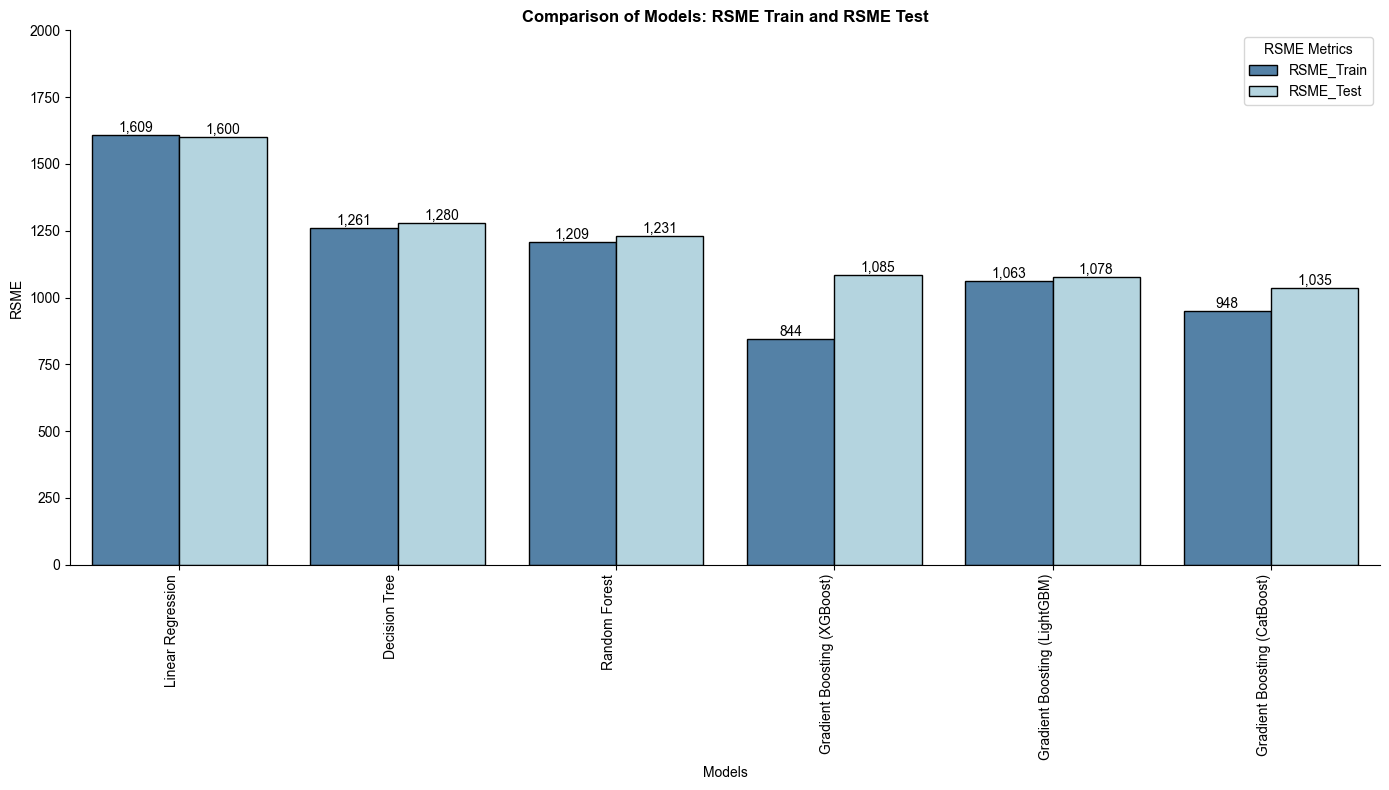

In [93]:
Models = ['Decision Tree', 'Random Forest', 'Linear Regression', 'Gradient Boosting (LightGBM)', 
          'Gradient Boosting (CatBoost)', 'Gradient Boosting (XGBoost)']

RSME_Train = [RMSE_decision_tree_train, RMSE_random_forest_train, RMSE_linear_regression_train,
              RMSE_lightgbm_train, RMSE_catboost_train, RMSE_xgboost_train]
RSME_Test = [RMSE_decision_tree, RMSE_random_forest, RMSE_linear_regression, RMSE_lightgbm, RMSE_catboost, RMSE_xgboost]

data = pd.DataFrame({'Models': Models, 'RSME_Train': RSME_Train, 'RSME_Test': RSME_Test})
data = data.sort_values(by='RSME_Test', ascending=False)

melted_data = data.melt(id_vars=['Models'], value_vars=['RSME_Train', 'RSME_Test'], 
                        var_name='Metric', value_name='RSME')

fig, ax1 = plt.subplots(figsize=(14, 8))

custom_palette = {'RSME_Train': 'steelblue', 'RSME_Test': 'lightblue'}
sns.barplot(data=melted_data, x='Models', y='RSME', hue='Metric', ax=ax1, 
            palette=custom_palette, edgecolor='black')
ax1.set_ylabel('RSME')
ax1.set_xlabel('Models')
ax1.set_ylim(0, 2000)
ax1.tick_params(axis='y')
ax1.set_title('Comparison of Models: RSME Train and RSME Test', fontweight='bold')

ax1.legend(loc='upper right', title='RSME Metrics')
ax1.set_xticklabels(data['Models'], rotation=90, ha='right')

mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "Helvetica", "DejaVu Sans", "Bitstream Vera Sans"]

ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for patch in ax1.patches:
    height = patch.get_height()
    if height > 0:
        ax1.text(
            patch.get_x() + patch.get_width() / 2, 
            height, 
            f'{height:,.0f}',  
            ha='center', 
            va='bottom'
        )

plt.tight_layout()
plt.show()